In [18]:
import pymysql.cursors
import pandas as pd

conn = pymysql.connect(host='172.20.95.116', user='emily0', password='1234',
                       db='leisure', charset='utf8')

In [ ]:
cur = conn.cursor(pymysql.cursors.DictCursor)
query = """
select tr.year, tr.전국 as 티켓판매액, e.전국 as 고용률
from ticket_revenue as tr
	inner join employment_data as e on tr.year = e.year
"""
cur.execute(query)
rows = cur.fetchall() 
result_df = pd.DataFrame(rows) 
print(result_df)
cur.close()
conn.close()

   year          티켓판매액   고용률
0  2015     37,213,679  60.5
1  2016     48,810,124  60.6
2  2017    101,922,630  60.8
3  2018    101,258,358  60.7
4  2019    455,106,958  60.9
5  2020    222,282,480  60.1
6  2021    399,321,958  60.5
7  2022  1,026,463,718  62.1
8  2023  1,266,991,392  62.6
9  2024  1,458,877,718  62.7


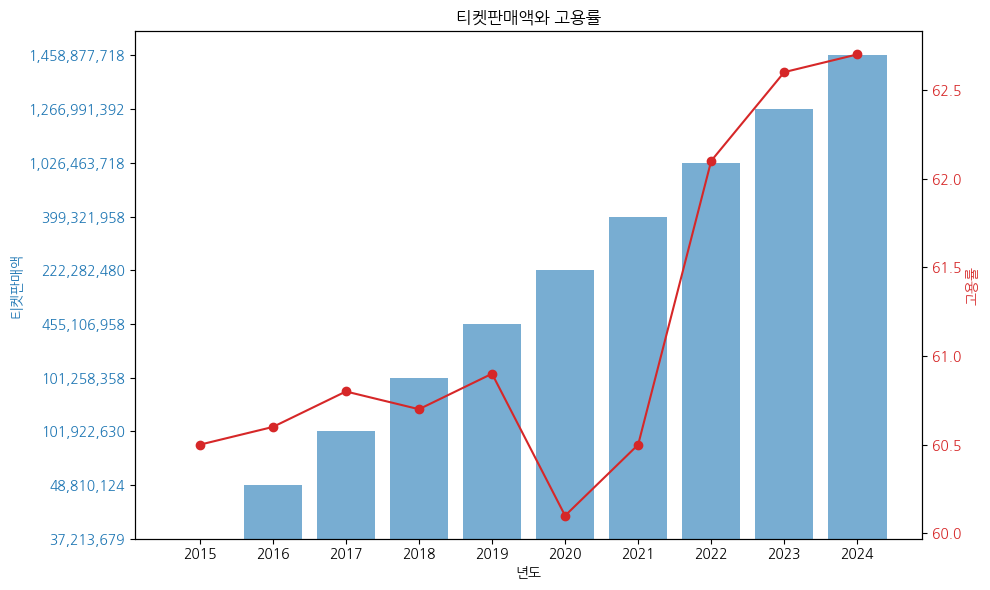

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

fig, ax1 = plt.subplots(figsize=(10, 6))  # 그래프 크기 조정

# 티켓판매수 시각화 (왼쪽 y축)
ax1.set_xlabel('년도')
ax1.set_ylabel('티켓판매액', color='tab:blue')
ax1.bar(result_df['year'], result_df['티켓판매액'], color='tab:blue', alpha=0.6, label='티켓판매액')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 실업률 시각화 (오른쪽 y축)
ax2 = ax1.twinx()
ax2.set_ylabel('고용률', color='tab:red')
ax2.plot(result_df['year'], result_df['고용률'], color='tab:red', marker='o', label='고용률')
ax2.tick_params(axis='y', labelcolor='tab:red')

# x축 레이블 회전
ax1.set_xticks(result_df['year'])
ax1.set_xticklabels(result_df['year'])

# 제목 설정
plt.title('티켓판매액와 고용률')
fig.tight_layout()
plt.show()

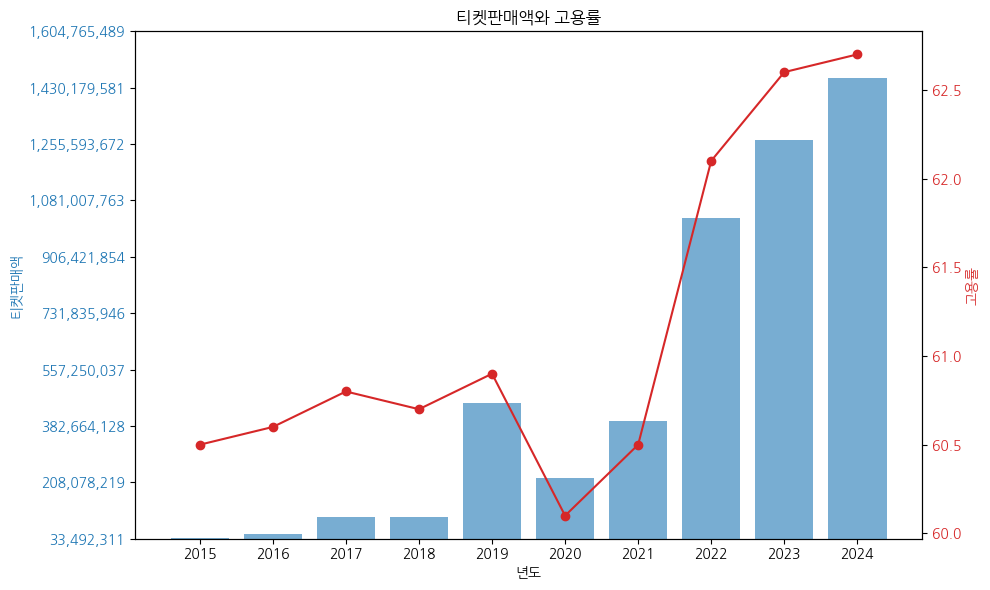

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

fig, ax1 = plt.subplots(figsize=(10, 6))  # 그래프 크기 조정

# 데이터 변환: 쉼표(,) 제거 후 숫자로 변환 (오류 방지)
result_df['티켓판매액'] = result_df['티켓판매액'].astype(str).str.replace(',', '').astype(float)

# 티켓판매액 시각화 (왼쪽 y축)
ax1.set_xlabel('년도')
ax1.set_ylabel('티켓판매액', color='tab:blue')
ax1.bar(result_df['year'], result_df['티켓판매액'], color='tab:blue', alpha=0.6, label='티켓판매액')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# y축 범위 및 정렬된 눈금 설정
y_min = min(result_df['티켓판매액']) * 0.9  # 최소값을 조금 낮춤 (가독성 개선)
y_max = max(result_df['티켓판매액']) * 1.1  # 최대값을 조금 높임
ax1.set_ylim(37213679, 1458877718)  # y축 범위 설정
ax1.set_yticks(np.linspace(y_min, y_max,num=10))  # 정렬된 눈금 설정

# y축 숫자를 보기 쉽게 포맷 (예: 1,000 단위 쉼표 추가)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

# 고용률 시각화 (오른쪽 y축)
ax2 = ax1.twinx()  # 오른쪽 y축 생성
ax2.set_ylabel('고용률', color='tab:red')
ax2.plot(result_df['year'], result_df['고용률'], color='tab:red', marker='o', label='고용률')
ax2.tick_params(axis='y', labelcolor='tab:red')

# x축 레이블 설정
ax1.set_xticks(result_df['year'])
ax1.set_xticklabels(result_df['year'])

# 제목과 레이아웃 설정
plt.title('티켓판매액와 고용률')
fig.tight_layout()  # 레이아웃 조정
plt.show()